In [1]:
# As in HW1 I will be looking at the Bible and Lord of the Rings: The Fellowship of the Ring for my texts
# importing required nltk libraries
import nltk
from nltk import sent_tokenize

# loading the Bible corpus
nltk.corpus.gutenberg.fileids( ) # getting gutenberg corpus
file0 = nltk.corpus.gutenberg.fileids( ) [3] #selecting the file of the bible
Btext = nltk.corpus.gutenberg.raw(file0)
print(Btext[:150])
#Loading the Fellowship corpus
f=open('fellowship.txt', 'r') # opening the text file for the fellowship of the ring
Ftext = f.read()
print(Ftext[:150])

[The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called Genesis


1:1 In the beginning God created the hea
ï»¿Three Rings for the Elven-kings under the sky,
               Seven for the Dwarf-lords in their halls of stone,
            Nine for Mortal Men do


In [3]:
# Preprocessing separating the text into sentences
#first the bible
Btextsplit = nltk.sent_tokenize(Btext)
print(Btextsplit[:10])
#the fellowship
Ftextsplit = nltk.sent_tokenize(Ftext)
print(Ftextsplit[:10])

['[The King James Bible]\n\nThe Old Testament of the King James Bible\n\nThe First Book of Moses:  Called Genesis\n\n\n1:1 In the beginning God created the heaven and the earth.', '1:2 And the earth was without form, and void; and darkness was upon\nthe face of the deep.', 'And the Spirit of God moved upon the face of the\nwaters.', '1:3 And God said, Let there be light: and there was light.', '1:4 And God saw the light, that it was good: and God divided the light\nfrom the darkness.', '1:5 And God called the light Day, and the darkness he called Night.', 'And the evening and the morning were the first day.', '1:6 And God said, Let there be a firmament in the midst of the waters,\nand let it divide the waters from the waters.', '1:7 And God made the firmament, and divided the waters which were\nunder the firmament from the waters which were above the firmament:\nand it was so.', '1:8 And God called the firmament Heaven.']
['ï»¿Three Rings for the Elven-kings under the sky,\n           

In [6]:
# Applying the word tokenizer to each sentence in the Bible
Btokentext = [nltk.word_tokenize(sent) for sent in Btextsplit]
print(Btokentext[:2])
#the output is a list of strings that contains the sentences
type(Btokentext)
len(Btokentext)

# Applying the word tokenizer to each sentence in the Fellowship
Ftokentext = [nltk.word_tokenize(sent) for sent in Ftextsplit]
print(Ftokentext[:2])
#the output is a list of strings that contains the sentences
type(Ftokentext)
len(Ftokentext)

[['[', 'The', 'King', 'James', 'Bible', ']', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', ':', 'Called', 'Genesis', '1:1', 'In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.'], ['1:2', 'And', 'the', 'earth', 'was', 'without', 'form', ',', 'and', 'void', ';', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', '.']]
[['ï', '»', '¿Three', 'Rings', 'for', 'the', 'Elven-kings', 'under', 'the', 'sky', ',', 'Seven', 'for', 'the', 'Dwarf-lords', 'in', 'their', 'halls', 'of', 'stone', ',', 'Nine', 'for', 'Mortal', 'Men', 'doomed', 'to', 'die', ',', 'One', 'for', 'the', 'Dark', 'Lord', 'on', 'his', 'dark', 'throne', 'In', 'the', 'Land', 'of', 'Mordor', 'where', 'the', 'Shadows', 'lie', '.'], ['One', 'Ring', 'to', 'rule', 'them', 'all', ',', 'One', 'Ring', 'to', 'find', 'them', ',', 'One', 'Ring', 'to', 'bring', 'them', 'all', 'and', 'in', 'the', 'darkness', 'bind', 'them', 'In', 'th

13406

In [7]:
## POS Tagging, to retrieve adjective (JJs) and adverb (RBs) tags in the Bible
Btaggedtext = [nltk.pos_tag(tokens) for tokens in Btokentext]
print(Btaggedtext[:2])
## POS Tagging, to retrieve adjective (JJs) and adverb (RBs) tags in the Fellowship
Ftaggedtext = [nltk.pos_tag(tokens) for tokens in Ftokentext]
print(Ftaggedtext[:2])

[[('[', 'VB'), ('The', 'DT'), ('King', 'NNP'), ('James', 'NNP'), ('Bible', 'NNP'), (']', 'VBZ'), ('The', 'DT'), ('Old', 'NNP'), ('Testament', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('King', 'NNP'), ('James', 'NNP'), ('Bible', 'NNP'), ('The', 'DT'), ('First', 'NNP'), ('Book', 'NNP'), ('of', 'IN'), ('Moses', 'NNS'), (':', ':'), ('Called', 'VBN'), ('Genesis', 'NNP'), ('1:1', 'CD'), ('In', 'IN'), ('the', 'DT'), ('beginning', 'NN'), ('God', 'NNP'), ('created', 'VBD'), ('the', 'DT'), ('heaven', 'NN'), ('and', 'CC'), ('the', 'DT'), ('earth', 'NN'), ('.', '.')], [('1:2', 'CD'), ('And', 'CC'), ('the', 'DT'), ('earth', 'NN'), ('was', 'VBD'), ('without', 'IN'), ('form', 'NN'), (',', ','), ('and', 'CC'), ('void', 'NN'), (';', ':'), ('and', 'CC'), ('darkness', 'NN'), ('was', 'VBD'), ('upon', 'IN'), ('the', 'DT'), ('face', 'NN'), ('of', 'IN'), ('the', 'DT'), ('deep', 'NN'), ('.', '.')]]
[[('ï', 'JJ'), ('»', 'NNP'), ('¿Three', 'NNP'), ('Rings', 'NNP'), ('for', 'IN'), ('the', 'DT'), ('Elven-kings', 'NNS

In [9]:
#Chunking and frequency tags for the Bible
# Using chunking to parse sentences to look for "adjective phrases" that have adverbs and adjectives
import re
grammar_adjph = "ADJPH: {<RB.?>+<JJ.?>}"

# Second step: import the nltk parser to process each sentence
chunk_parser_adj = nltk.RegexpParser(grammar_adjph)

Badjph_tags = []
for sent in Btaggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adj.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADJPH':
                Badjph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
Badjective_phrases = []
for sent in Badjph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    Badjective_phrases.append(temp)
    
print('First 10 adjective phrases: ', Badjective_phrases[:10])

## FREQUENCY DISTRIBUTIONS
# Top 50 adjective phrases
Bfreq_adjph = nltk.FreqDist(Badjective_phrases)

print('Top adjective phrases by frequency: ')
for word, freq in Bfreq_adjph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adjective phrase sentences: ', len(Badjph_tags))


First 10 adjective phrases:  ['together unto ', 'very good ', 'not good ', 'more subtil ', 'not surely die ', 'also unto ', 'not respect ', 'very wroth ', 'Therefore whosoever ', 'not always strive ']
Top adjective phrases by frequency: 
even unto  52
not thy  43
most holy  41
very great  40
not able  35
away captive  32
not unto  29
as many  28
not afraid  25
not good  24
so much  18
not worthy  17
yet alive  15
so great  14
not lawful  14
together unto  13
also unto  13
sore afraid  13
most high  12
again unto  12
even thy  12
Then hear  12
so many  11
most High  11
not many  11
not thou  10
much more  10
surely die  9
Moreover thou  9
therefore unto  9
too strong  9
so shalt  9
no more  9
very grievous  8
not thine  8
Then thou  8
not forth  8
well pleased  8
not clean  7
very much  7
not so much  7
not mine  7
very good  6
away thy  6
more honourable  6
as much  6
Thus saith  6
Then shalt  6
very small  6
too much  6
Length of adjective phrase sentences:  2128


In [52]:
# Using chunking to parse sentences in the Fellowship

Fadvph_tags = []
for sent in Ftaggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adj.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADJPH':
                Fadjph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
Fadjective_phrases = []
for sent in Fadjph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    Fadjective_phrases.append(temp)
    
print('First 10 adjective phrases: ', Fadjective_phrases[:10])

## FREQUENCY DISTRIBUTIONS
# Top 50 adjective phrases
Ffreq_adjph = nltk.FreqDist(Fadjective_phrases)

print('Top adjective phrases by frequency: ')
for word, freq in Ffreq_adjph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adjective phrase sentences: ', len(Fadjph_tags))

First 10 adjective phrases:  ['yet more ancient ', 'primarily linguistic ', '_little hope_ ', 'not neglect ', 'less laborious ', 'indeed largely re-written ', 'really long ', 'perhaps not possible ', 'most critical ', 'too short ']
Top adjective phrases by frequency: 
too much  39
so much  39
once more  30
as much  24
not much  21
so many  21
not sure  21
very little  18
no longer  18
too late  18
too great  18
more important  15
very long  15
'Very good  15
no more  15
more likely  12
so strong  12
so fair  12
not last  12
too short  9
so important  9
not least  9
now many  9
not true  9
little more  9
very fond  9
also many  9
too sure  9
very small  9
far longer  9
very pleased  9
very hot  9
very quiet  9
more painful  9
as little  9
very anxious  9
less easy  9
very much  9
fast asleep  9
suddenly aware  9
more dangerous  9
very cold  9
as light  9
very strange  9
very weary  9
far south  9
very ancient  6
most numerous  6
not many  6
most important  6
Length of adjective phrase s

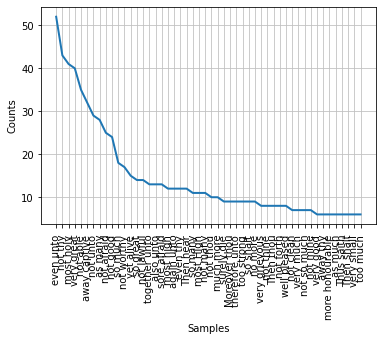

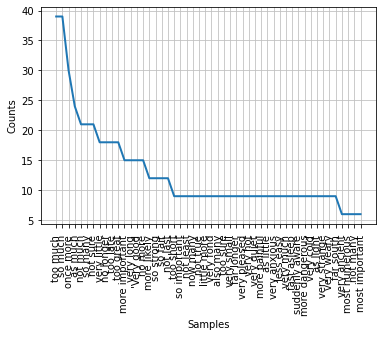

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [77]:
Bfreq_adjph.plot(50, cumulative = False)
Ffreq_adjph.plot(50, cumulative = False)

In [33]:
# Now we look for "adverb phrases" or chunks that have 2 consecutive adverbs ('RB') in the Bible
# First step: writing a grammar that defines POS rules of the adverb phrase the chunk
# we name this grammar "ADVPH" ("ADVerb PHrase")
grammar_advph = "ADVPH: {<RB>+<RB>}"

# Second step: import the nltk parser to process each sentence
chunk_parser_adv = nltk.RegexpParser(grammar_advph)

Badvph_tags = []
for sent in Btaggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adv.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADVPH':
                Badvph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
Badverb_phrases = []
for sent in Badvph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    Badverb_phrases.append(temp)
    
print('First 10 adverb phrases: ', Badverb_phrases[:10])

# top 50 adjective phrases
Bfreq_advph = nltk.FreqDist(Badverb_phrases)

print('Top adverb phrases by frequency: ')
for word, freq in Bfreq_advph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adverb phrase sentences: ', len(Badvph_tags))

First 10 adverb phrases:  ['forth abundantly ', 'forth abundantly ', 'not surely ', 'not well ', 'not always ', 'not again ', 'not again ', 'now therefore ', 'up now ', 'art northward ']
Top adverb phrases by frequency: 
Now therefore  101
as soon  39
not yet  33
even so  26
not so  25
now therefore  22
as long  22
not only  21
not again  19
not away  19
ye not  18
as well  18
yet again  16
ye now  14
Even so  14
not up  13
So then  13
not thou  12
back again  11
far off  11
so long  10
not down  9
Therefore now  9
yet not  8
therefore now  8
down before  8
not aside  8
As soon  7
very sore  7
even now  7
not there  7
there not  7
not far  7
not well  6
not always  6
Not so  6
So there  6
not now  6
now also  6
as far  6
so also  6
up now  5
up early  5
there yet  5
very wroth  5
very far  5
far away  5
not even  5
ye also  5
also here  4
Length of adverb phrase sentences:  1374


In [53]:
# Now we look for "adverb phrases" or chunks that have 2 consecutive adverbs ('RB') in the Fellowship
# First step: writing a grammar that defines POS rules of the adverb phrase the chunk
# we name this grammar "ADVPH" ("ADVerb PHrase")

Fadvph_tags = []
for sent in Ftaggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adv.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADVPH':
                Fadvph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
Fadverb_phrases = []
for sent in Fadvph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    Fadverb_phrases.append(temp)
    
print('First 10 adverb phrases: ', Fadverb_phrases[:10])

# top 50 adjective phrases
Ffreq_advph = nltk.FreqDist(Fadverb_phrases)

print('Top adverb phrases by frequency: ')
for word, freq in Ffreq_advph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adverb phrase sentences: ', len(Fadvph_tags))

First 10 adverb phrases:  ['as well ', 'not yet ', 'not now ', 'indeed largely ', 'inevitably often ', 'perhaps not ', 'then certainly ', 'not long ', 'indeed personally ', 'now often ']
Top adverb phrases by frequency: 
long ago  36
far away  32
not yet  26
as well  25
as soon  22
as far  21
so far  20
As soon  17
not even  15
not far  14
as long  13
not so  13
down again  11
no longer  10
very much  9
'All right  9
back again  9
then suddenly  8
'Very well  7
Then suddenly  7
as quickly  7
not now  6
not only  6
so long  6
Not even  5
not quite  5
once again  5
as much  5
only just  5
Not far  5
ere long  4
not enough  4
not really  4
n't often  4
there long  4
too long  4
too far  4
far ahead  4
Even now  4
then again  4
well enough  4
yet not  4
still there  4
Very well  4
not too  4
now only  3
very well  3
further off  3
as often  3
Not very  3
Length of adverb phrase sentences:  1236


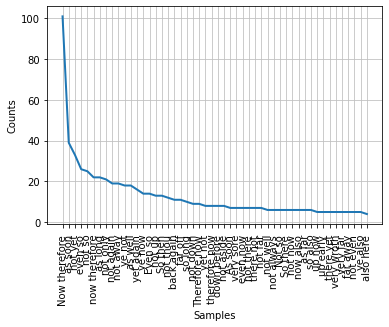

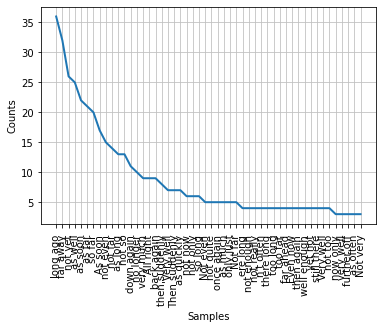

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [78]:
Bfreq_advph.plot(50, cumulative = False)
Ffreq_advph.plot(50, cumulative = False)

In [35]:
# Top 50 adverb tokens in the Bible

Badverb_tokens = []
for sentence in Btaggedtext:
    for word, pos in sentence:
        if pos in ['RB', 'RBR', 'RBS']: # adverb, comparative, superlative
            if len(word)>1:
                Badverb_tokens.append(word)
Bfreq_adverb = nltk.FreqDist(Badverb_tokens)

for word, freq in Bfreq_adverb.most_common(50):
    print(word,freq)

not 6737
also 1665
Then 1374
even 1296
so 819
then 795
now 713
there 674
Now 643
again 629
away 605
therefore 540
yet 529
together 480
ever 475
down 466
ye 463
up 394
more 376
behold 330
So 323
Thus 314
thus 290
very 254
forth 209
only 203
well 197
surely 196
as 178
far 170
Moreover 144
here 141
thee 141
long 124
most 109
Therefore 105
back 105
Also 104
alone 101
still 101
therein 99
much 97
Even 93
just 90
first 88
greatly 86
never 85
thou 82
no 82
utterly 82


In [36]:
# Top 50 adverb tokens in the Fellowship

Fadverb_tokens = []
for sentence in Ftaggedtext:
    for word, pos in sentence:
        if pos in ['RB', 'RBR', 'RBS']: # adverb, comparative, superlative
            if len(word)>1:
                Fadverb_tokens.append(word)
Ffreq_adverb = nltk.FreqDist(Fadverb_tokens)

for word, freq in Ffreq_adverb.most_common(50):
    print(word,freq)

not 1510
now 591
n't 471
again 415
so 325
still 323
then 317
far 314
away 306
back 275
here 259
only 246
there 227
even 224
very 221
Then 211
long 202
more 190
as 180
too 176
yet 174
down 172
ever 169
well 160
never 156
once 153
suddenly 131
soon 128
up 123
indeed 111
just 111
already 101
much 95
also 90
ago 86
alone 85
forward 80
together 74
often 73
ahead 73
slowly 73
rather 67
enough 66
Now 62
Suddenly 62
quite 59
first 58
almost 57
perhaps 55
Even 55


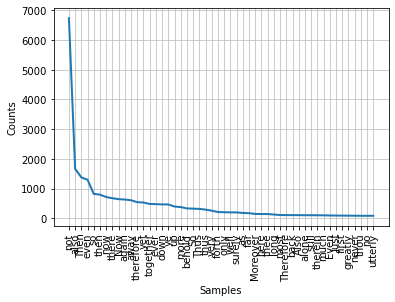

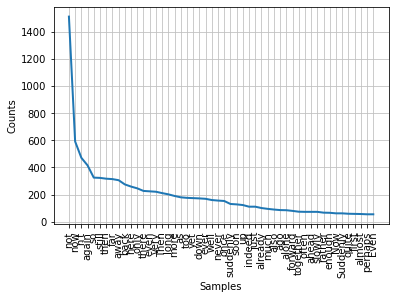

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [79]:
Bfreq_adverb.plot(50, cumulative=False)
Ffreq_adverb.plot(50, cumulative=False)

In [37]:
# Top 50 Noun tokens in the Bible

Bnoun_tokens = []
for sentence in Btaggedtext:
    for word, pos in sentence:
        if pos in ['NN', 'NNS', 'NNP', 'NNPS']: # noun, plural noun, proper nound singular and plural
            if len(word)>1:
                Bnoun_tokens.append(word)
Bfreq_noun = nltk.FreqDist(Bnoun_tokens)

for word, freq in Bfreq_noun.most_common(50):
    print(word,freq)

LORD 6633
God 4099
thee 2908
man 2714
Israel 2570
thou 2348
king 2167
people 2143
son 2096
house 2023
children 1812
day 1737
land 1712
men 1653
ye 1526
hand 1466
hath 1248
things 1162
shalt 1143
sons 1090
Lord 1064
David 1058
Jesus 975
earth 972
name 951
city 868
days 864
heart 833
hast 825
father 822
Moses 821
Judah 814
Jerusalem 813
place 703
word 692
offering 679
way 664
thereof 636
time 623
Egypt 610
Behold 585
Thou 584
Christ 563
thy 549
fathers 547
words 546
brethren 544
thing 541
years 539
fire 538


In [38]:
# Top 50 Noun tokens in the Fellowship

Fnoun_tokens = []
for sentence in Ftaggedtext:
    for word, pos in sentence:
        if pos in ['NN', 'NNS', 'NNP', 'NNPS']: # noun, plural noun, proper nound singular and plural
            if len(word)>1:
                Fnoun_tokens.append(word)
Ffreq_noun = nltk.FreqDist(Fnoun_tokens)

for word, freq in Ffreq_noun.most_common(50):
    print(word,freq)

Frodo 1090
Gandalf 456
Sam 400
Bilbo 321
time 267
way 267
hobbits 217
night 214
Ring 210
Pippin 209
Shire 204
Aragorn 203
Strider 203
eyes 196
light 194
trees 190
Merry 190
things 181
side 175
hand 169
Elves 169
water 168
day 164
land 154
road 154
Boromir 154
end 144
others 140
feet 139
Mr. 136
Elrond 131
fire 125
Tom 125
days 121
Gimli 120
voice 119
world 117
words 117
heart 117
wind 115
door 114
â€ 112
dark 111
stone 109
path 109
moment 108
something 105
nothing 105
folk 105
Road 105


In [39]:
# Top 50 Verb tokens in the Bible

Bverb_tokens = []
for sentence in Btaggedtext:
    for word, pos in sentence:
        if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']: # verb, past tense, gerund, past participle, non 3rd person singular adn 3rd person singular
            if len(word)>1:
                Bverb_tokens.append(word)
Bfreq_verb = nltk.FreqDist(Bverb_tokens)

for word, freq in Bfreq_verb.most_common(50):
    print(word,freq)

be 6877
is 6832
was 4515
said 3995
have 3842
are 2912
were 2767
came 2091
had 2025
come 1759
made 1405
went 1399
saying 1362
do 1278
go 1250
ye 1053
saith 1052
let 1049
thou 1003
make 997
say 992
did 977
hath 941
put 862
am 856
brought 848
pass 770
according 762
took 749
give 746
know 719
take 708
sent 656
bring 651
set 641
called 623
done 565
saw 537
see 531
heard 524
given 498
answered 490
gave 465
eat 453
cast 450
commanded 442
found 398
unto 384
spake 379
hear 370


In [40]:
# Top 50 Verb tokens in the Fellowship

Fverb_tokens = []
for sentence in Ftaggedtext:
    for word, pos in sentence:
        if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']: # verb, past tense, gerund, past participle, non 3rd person singular adn 3rd person singular
            if len(word)>1:
                Fverb_tokens.append(word)
Ffreq_verb = nltk.FreqDist(Fverb_tokens)

for word, freq in Ffreq_verb.most_common(50):
    print(word,freq)

was 2465
said 1477
is 1327
had 1261
were 1049
have 1018
be 888
are 660
do 626
been 455
came 435
go 363
did 304
come 302
has 299
seemed 297
see 294
know 279
went 266
looked 250
am 222
heard 210
say 200
made 197
found 195
think 195
saw 192
's 180
seen 171
going 160
stood 155
find 150
fell 150
thought 150
began 149
passed 149
felt 149
get 146
left 146
cried 142
turned 135
asked 131
take 130
took 127
got 124
make 121
set 116
answered 115
lay 113
sat 112


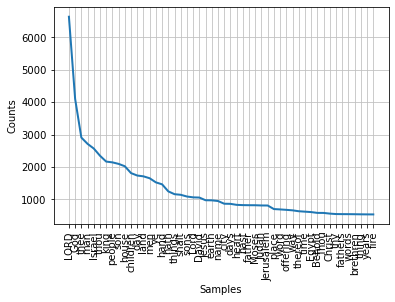

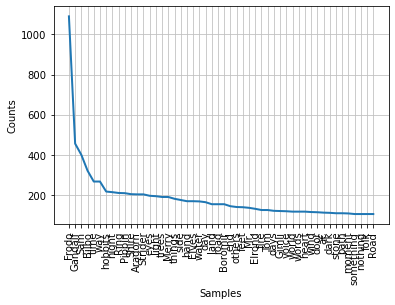

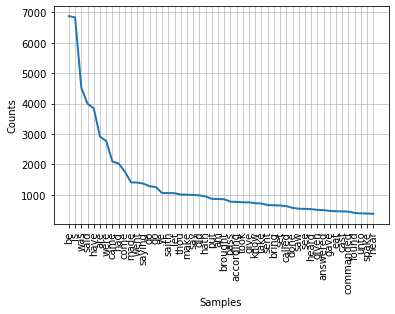

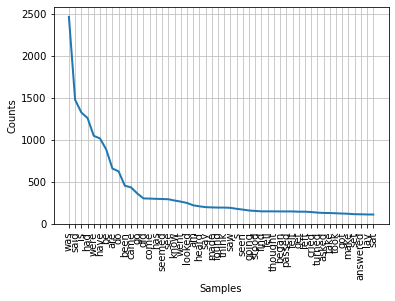

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [80]:
Bfreq_noun.plot(50, cumulative=False)
Ffreq_noun.plot(50, cumulative=False)
Bfreq_verb.plot(50, cumulative=False)
Ffreq_verb.plot(50, cumulative=False)

In [41]:
#running statistics on the sentences we created earlier for the Bible
# Create a list of original sentences from the ADJECTIVE phrase subset:
Badjph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in Badjph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        Badjph_whole_sentences.append(temp)
        
print(len(Badjph_whole_sentences))

4393


In [42]:
#running statistics on the sentences we created earlier for the Fellowship
# Create a list of original sentences from the ADJECTIVE phrase subset:
Fadjph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in Fadjph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        Fadjph_whole_sentences.append(temp)
        
print(len(Fadjph_whole_sentences))

5060


In [44]:
# Create a list of original sentences from the ADVERB phrase subset for the Bible:
Badvph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in Badvph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        Badvph_whole_sentences.append(temp)
        
print(len(Badvph_whole_sentences))

2816


In [45]:
# Create a list of original sentences from the ADVERB phrase subset for the Fellowship:
Fadvph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in Fadvph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        Fadvph_whole_sentences.append(temp)
        
print(len(Fadvph_whole_sentences))

2567


In [46]:
# OPTIONAL STEP: Combine lists together to have a single list of adjective/adverb phrases: BIBLE
# Useful to know which sentences are heavy in qualifiers

# create a new variable to store all adjective phrase sentences
Badv_adj_phrase_sentences = Badjph_whole_sentences

# iterate over adverb phrase sentences
for sent in Badvph_whole_sentences:
    # if a sentence is not in the adjective phrases list imported
    if sent not in Badv_adj_phrase_sentences:
        # attach that sentence
        Badv_adj_phrase_sentences.append(sent)

# print the lenght of the list (i.e. number of sentences with both adjective and adverb phrases)
print(len(Badv_adj_phrase_sentences))


4940


In [47]:
# OPTIONAL STEP: Combine lists together to have a single list of adjective/adverb phrases: FELLOWSHIP
# Useful to know which sentences are heavy in qualifiers

# create a new variable to store all adjective phrase sentences
Fadv_adj_phrase_sentences = Fadjph_whole_sentences

# iterate over adverb phrase sentences
for sent in Fadvph_whole_sentences:
    # if a sentence is not in the adjective phrases list imported
    if sent not in Fadv_adj_phrase_sentences:
        # attach that sentence
        Fadv_adj_phrase_sentences.append(sent)

# print the lenght of the list (i.e. number of sentences with both adjective and adverb phrases)
print(len(Fadv_adj_phrase_sentences))


5790


In [48]:
## CORPUS STATISTICS--SENTENCES LENGTH for the Bible

# Calculating the average length of sentences in the entire corpus
# from http://www.nltk.org/book_1ed/ch04.html
Btotal_corpus = sum(len(sent) for sent in Btextsplit) # remember: 'textsplit' is our text split into sentences
print(Btotal_corpus / len(Btextsplit))

143.44331141822084


In [49]:
## CORPUS STATISTICS--SENTENCES LENGTH for the Fellowship

# Calculating the average length of sentences in the entire corpus
# from http://www.nltk.org/book_1ed/ch04.html
Ftotal_corpus = sum(len(sent) for sent in Ftextsplit) # remember: 'textsplit' is our text split into sentences
print(Ftotal_corpus / len(Ftextsplit))

73.87513053856482


In [50]:
# Calculate the average length of an adjective phrase sentence in the Bible
# We can then compare the average length of the adjective phrases to 
# the average sentences we calculated for all sentences in the corpus
Btotal_adjph_sentences = sum(len(sent) for sent in Badjph_whole_sentences) # adjph_whole_sentences stores our adjective phrases
print(Btotal_adjph_sentences / len(Badjph_whole_sentences))

8.610526315789473


In [51]:
# Calculate the average length of an adjective phrase sentence in the Fellowship
# We can then compare the average length of the adjective phrases to 
# the average sentences we calculated for all sentences in the corpus
Ftotal_adjph_sentences = sum(len(sent) for sent in Fadjph_whole_sentences) # adjph_whole_sentences stores our adjective phrases
print(Ftotal_adjph_sentences / len(Fadjph_whole_sentences))

9.199827288428324
